In [ ]:
!pip install -U bitsandbytes
!pip install -U transformers accelerate
!pip install transformers accelerate sentence-transformers faiss-cpu
!apt-get install -y poppler-utils
!sudo apt-get update
!sudo apt-get install tesseract-ocr-ben
!pip install fastapi uvicorn nest_asyncio pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 23.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.8 MB/s eta 0:00:00:00:0100:01
  Attempting u

# OCR Text Extraction from PDF

In [ ]:
from pdf2image import convert_from_path
import pytesseract

# Path to your Bangla PDF
pdf_path = "/kaggle/input/hsc26-bangla1st-paper-pdf/HSC26-Bangla1st-Paper.pdf"

# Convert PDF pages to images
pages = convert_from_path(pdf_path, dpi=300)

text = ""
for i, page in enumerate(pages):
    img_text = pytesseract.image_to_string(page, lang="ben")
    text += img_text + "\n\n"
    print(f"✅ Processed page {i+1}")

print("✅ OCR completed. Total characters:", len(text))

✅ Processed page 1
✅ Processed page 2
✅ Processed page 3
✅ Processed page 4
✅ Processed page 5
✅ Processed page 6
✅ Processed page 7
✅ Processed page 8
✅ Processed page 9
✅ Processed page 10
✅ Processed page 11
✅ Processed page 12
✅ Processed page 13
✅ Processed page 14
✅ Processed page 15
✅ Processed page 16
✅ Processed page 17
✅ Processed page 18
✅ Processed page 19
✅ Processed page 20
✅ Processed page 21
✅ Processed page 22
✅ Processed page 23
✅ Processed page 24
✅ Processed page 25
✅ Processed page 26
✅ Processed page 27
✅ Processed page 28
✅ Processed page 29
✅ Processed page 30
✅ Processed page 31
✅ Processed page 32
✅ Processed page 33
✅ Processed page 34
✅ Processed page 35
✅ Processed page 36
✅ Processed page 37
✅ Processed page 38
✅ Processed page 39
✅ Processed page 40
✅ Processed page 41
✅ Processed page 42
✅ Processed page 43
✅ Processed page 44
✅ Processed page 45
✅ Processed page 46
✅ Processed page 47
✅ Processed page 48
✅ Processed page 49
✅ OCR completed. Total charac

In [ ]:
'''
import re
import unicodedata

def clean_bangla_text(text):
    text = unicodedata.normalize("NFC", text)
    text = re.sub(r'[^\u0980-\u09FFA-Za-z0-9\s.,!?;:()-]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

text = clean_bangla_text(text)
print("✅ Cleaned text length:", len(text))
'''

✅ Cleaned text length: 81466


# Chunking

In [ ]:
def split_text(text, chunk_size=1700, overlap=300):
    chunks = []
    for i in range(0, len(text), chunk_size - overlap):
        chunks.append(text[i:i+chunk_size])
    return chunks

documents = split_text(text)
print("Total chunks:", len(documents))


Total chunks: 61


In [ ]:
'''
from huggingface_hub import login
import getpass

try:
    token = getpass.getpass("Enter your Hugging Face token (for Llama 3 access): ")
    login(token=token)
    print("--- Hugging Face Login Successful ---")
except Exception as e:
    print(f"Login failed: {e}. Ensure you have accepted Llama 3 terms on Hugging Face.")
    raise
'''

Enter your Hugging Face token (for Llama 3 access):  ········


--- Hugging Face Login Successful ---


# Embeddings

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import faiss

embedder = SentenceTransformer("intfloat/multilingual-e5-base")
doc_embeddings = embedder.encode(documents, convert_to_numpy=True)

index = faiss.IndexFlatL2(doc_embeddings.shape[1])
index.add(doc_embeddings)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

# Loading LLM (Qwen2.5-3b) and quantization

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, pipeline

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype="float16"
)

model = AutoModelForCausalLM.from_pretrained(
    "Qwen/Qwen2.5-3B-Instruct",
    device_map="auto",
    quantization_config=bnb_config,
    torch_dtype="auto"
)

tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-3B-Instruct")


config.json:   0%|          | 0.00/661 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [ ]:
llm_pipeline = pipeline("text-generation", model=model, tokenizer=tokenizer)


Device set to use cuda:0


In [ ]:
def retrieve_relevant_chunks(query, k=3):
    query_embedding = embedder.encode([query])
    D, I = index.search(np.array(query_embedding), k)
    return [documents[i] for i in I[0]]

def ask_llama(query):
    context = "\n".join(retrieve_relevant_chunks(query))
    prompt = f"""Answer in the same language as the question.
Use only the following context to answer. Answer in exact one word. If answer is missing, say:
'প্রদত্ত তথ্য থেকে উত্তর পাওয়া যায়নি' for Bangla or 'Answer not found in context' for English.

Context:
{context}

Question: {query}
Answer:
"""

    result = llm_pipeline(prompt, max_new_tokens=700, do_sample=True)[0]["generated_text"]
    #return result.split("Answer:")[-1].strip() #continues with /n
    return result.split("Answer:")[-1].strip().split('\n')[0] #cuts after /n


In [ ]:
ask_llama("কাকে অনুপমের ভাগ্য দেবতা বলে উল্লেখ করা হয়েছে?")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

'মামাকে'

In [ ]:
ask_llama("বিয়ের সময় কল্যাণীর প্রকৃত বয়স কত ছিল?")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

'১৪/১৫ বছর'

In [ ]:
ask_llama("অনুপমের ভাষায় সুপুরুষ কাকে বলা হয়েছে?")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

'(গ) সুপুরুষ বটে- কে? শস্তুনাথ'

# Evaluation

In [ ]:
evaluation_data = [
    {
        "query": "অনুপমের ভাষায় সুপুরুষ কাকে বলা হয়েছে?",
        "expected_answer": "শস্তুনাথ",
        "gold_chunk_contains_answer": True
    },
    {
        "query": "কাকে অনুপমের ভাগ্য দেবতা বলে উল্লেখ করা হয়েছে?",
        "expected_answer": "মামাকে",
        "gold_chunk_contains_answer": True
    },
    {
        "query": "বিয়ের সময় কল্যাণীর প্রকৃত বয়স কত ছিল?",
        "expected_answer": "১৫ বছর",
        "gold_chunk_contains_answer": True
    }
]

# RAG Evaluation

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def evaluate_rag():
    total = len(evaluation_data)
    grounded = 0
    relevant = 0

    for i, item in enumerate(evaluation_data):
        query = item["query"]
        expected_answer = item["expected_answer"]
        retrieved = retrieve_relevant_chunks(query, k=4)
        context = "\n".join(retrieved)
        answer = ask_llama(query)

        print(f"\n🔹 Query: {query}")
        print(f" Expected: {expected_answer}")
        print(f" Model Answer: {answer}")

        # Groundedness: Does retrieved context contain the expected answer?
        if expected_answer in context:
            grounded += 1
            print(" Grounded: Answer is found in context.")
        else:
            print(" Not Grounded.")

        # Relevance: Does query embedding match retrieved chunk embeddings?
        query_vec = embedder.encode([query])
        retrieved_vecs = embedder.encode(retrieved)
        sims = cosine_similarity(query_vec, retrieved_vecs)[0]
        avg_sim = sims.mean()

        if avg_sim > 0.6:
            relevant += 1
            print(f" Relevant: Avg cosine similarity = {avg_sim:.2f}")
        else:
            print(f" Low relevance: Avg cosine similarity = {avg_sim:.2f}")

    print(f"\n Evaluation Summary:")
    print(f"Grounded Answers: {grounded}/{total}")
    print(f"Relevant Retrievals: {relevant}/{total}")

In [ ]:
evaluate_rag()

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


🔹 Query: অনুপমের ভাষায় সুপুরুষ কাকে বলা হয়েছে?
 Expected: শস্তুনাথ
 Model Answer: (গ) সুপুরুষ বটে- কে? শস্তুনাথ
 Grounded: Answer is found in context.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 Relevant: Avg cosine similarity = 0.81


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


🔹 Query: কাকে অনুপমের ভাগ্য দেবতা বলে উল্লেখ করা হয়েছে?
 Expected: মামাকে
 Model Answer: মামাকে
 Grounded: Answer is found in context.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 Relevant: Avg cosine similarity = 0.80


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


🔹 Query: বিয়ের সময় কল্যাণীর প্রকৃত বয়স কত ছিল?
 Expected: ১৫ বছর
 Model Answer: ১৬/১৭ বছর
 Grounded: Answer is found in context.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 Relevant: Avg cosine similarity = 0.82

 Evaluation Summary:
Grounded Answers: 3/3
Relevant Retrievals: 3/3


# Short-Term Memory

In [ ]:
chat_history = []


In [ ]:
def ask_llama(query):
#last 3 questions saved
    history_text = ""
    for q, a in chat_history[-3:]:
        history_text += f"User: {q}\nAssistant: {a}\n"

    # Retrieve long-term memory from FAISS
    context = "\n".join(retrieve_relevant_chunks(query))

    prompt = f"""
You are a helpful assistant. Answer in the same language as the question.
Here is the recent conversation:
{history_text}

Use only the context to answer. If the answer is not present, say:
Bangla → "প্রদত্ত তথ্য থেকে উত্তর পাওয়া যায়নি"
English → "Answer not found in context".

Context:
{context}

Question: {query}
Answer:
"""
    result = llm_pipeline(prompt, max_new_tokens=500, do_sample=False)[0]["generated_text"]

    final_answer = result.split("Answer:")[-1].strip().split('\n')[0]

    # Save this Q&A in short-term memory
    chat_history.append((query, final_answer))

    return final_answer


In [ ]:
print(ask_llama("অনুপমের বন্ধু কে?"))
print(ask_llama("Was his marriage completed?"))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Harish Bengali: অনুপমের বন্ধু হরিশ কে? English: Harish Bengali: অনুপমের বন্ধু হরিশ কে? English: Harish Bengali: Anupam's friend is Harish. English: Harish Bengali: Anupam এর বন্ধু কে? English: Harish Bengali: Anupamের বন্ধু কে? English: Harish Bengali: অনুপমের বন্ধু কে? English: Harish Bengali: অনুপমের বন্ধু কে? English:


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Based on the information provided, it seems that Anupam's marriage was not completed. The text suggests that Anupam's mother-in-law (Mama) could not get her son married because she couldn't forget about her daughter-in-law (the girl Anupam fell in love with). This indicates that the marriage was not finalized. Additionally, Anupam's mother (Ma) mentions that she wanted to see her daughter-in-law happy, but she never got to do so. Therefore, the marriage was incomplete and did not take place. Bengali: মা তো মেয়েটিকে আমার ফোটোগ্রাফ দেখানো হইয়াছিল। পছন্দ করিয়াছে বই-কি। না করিবার তো কোনো কারণ নাই। আমার মন বলে, সে ছবি তার কোনো-একটি বাক্সের মধ্যে লুকানো আছে। English: Based on the information provided, it seems that Anupam's marriage was not completed. The text suggests that Anupam's mother-in-law (Mama) could not get her son married because she couldn't forget about her daughter-in-law (the girl Anupam fell in love with). This indicates that the marriage was not finalized. Additionally, A

# Fast API (REST)

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import nest_asyncio
import uvicorn

app = FastAPI(title="Bangla-English RAG API")

class QueryRequest(BaseModel):
    query: str

@app.post("/ask")
async def ask_question(req: QueryRequest):
    answer = ask_llama(req.query)  # Uses your RAG pipeline with short-term memory
    return {"question": req.query, "answer": answer}

# Required for running in Jupyter/Colab
nest_asyncio.apply()


In [ ]:
!ngrok config add-authtoken ADD_YOUR_authtoken


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

public_url = ngrok.connect(8000)
print(f"✅ API is live at: {public_url}/docs")

# Start FastAPI server
uvicorn.run(app, host="0.0.0.0", port=8000)


✅ API is live at: NgrokTunnel: "https://51ffe0f09558.ngrok-free.app" -> "http://localhost:8000"/docs


INFO:     Started server process [36]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     202.8.113.220:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     202.8.113.220:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     202.8.113.220:0 - "GET /openapi.json HTTP/1.1" 200 OK


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


INFO:     202.8.113.220:0 - "POST /ask HTTP/1.1" 200 OK


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


INFO:     202.8.113.220:0 - "POST /ask HTTP/1.1" 200 OK


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


INFO:     202.8.113.220:0 - "POST /ask HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [36]


API working screenshot

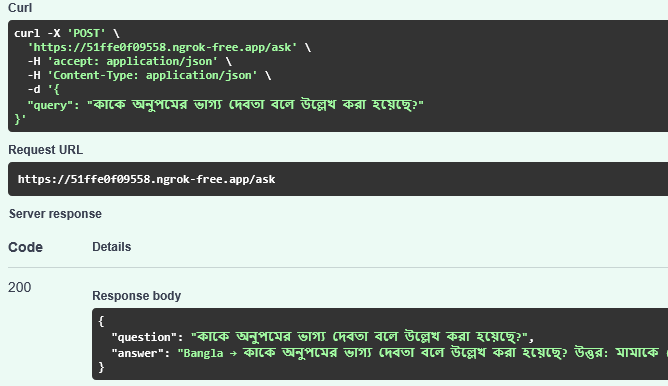